# Module 5  Data Cleaning And Preparation

In [1]:
import pandas as pd
import numpy as np

## Lecture 1

## Handling null values

### None: Non Pythonic Missing data

In [2]:
val1 =np.array([1,3,None,4])
val1

array([1, 3, None, 4], dtype=object)

In [3]:
#val1.sum() cannot be perform because of Null

### NaN: Missing numerical data

In [4]:
val2 =np.array([1,3,np.nan,4])
val2.dtype

dtype('float64')

In [5]:
val2

array([ 1.,  3., nan,  4.])

In [6]:
1+np.nan

nan

In [7]:
0*np.nan

nan

In [8]:
np.nansum(val2),np.nanmin(val2),np.nanmax(val2)

(8.0, 1.0, 4.0)

### NaN and None with Pandas

In [9]:
pd.Series([1,None,5,np.nan])

0    1.0
1    NaN
2    5.0
3    NaN
dtype: float64

In [10]:
data= pd.read_csv("D:/DATASETS/titanic/train.csv")
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

## Operations

### 1- isnull()

In [11]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
data.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [13]:
data.Age.isnull().sum()

177

### 2-notnull()

In [14]:
data.Age.notnull()

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

In [15]:
data.Age[data.Age.notnull()]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [16]:
df = pd.DataFrame({
     "A":[1,2,3,None],
     "B":['#Na',12,3,5],
     "C":[11,22,34,'no val'],
     "D":['No',2,np.nan,44],
     "E":['n/a',2,3,None],
})

In [17]:
df.to_csv('clean_me.csv')

In [18]:
df= pd.read_csv("clean_me.csv",index_col=[0])
df

A    B       C    D    E
0  1.0  #Na      11   No  NaN
1  2.0   12      22    2  2.0
2  3.0    3      34  NaN  3.0
3  NaN    5  no val   44  NaN

In [19]:
df= pd.read_csv("clean_me.csv",index_col=[0],na_values=['#Na','no val','No'])
df

A     B     C     D    E
0  1.0   NaN  11.0   NaN  NaN
1  2.0  12.0  22.0   2.0  2.0
2  3.0   3.0  34.0   NaN  3.0
3  NaN   5.0   NaN  44.0  NaN

In [20]:
df.isnull().sum()

A    1
B    1
C    1
D    2
E    2
dtype: int64

## Lecture 2

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

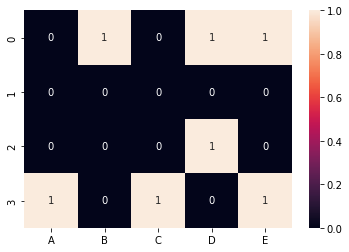

In [22]:
sns.heatmap(df.isnull(),annot=True)

In [23]:
import sys
!{sys.executable} -m pip install missingno


In [24]:
import missingno as msna

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

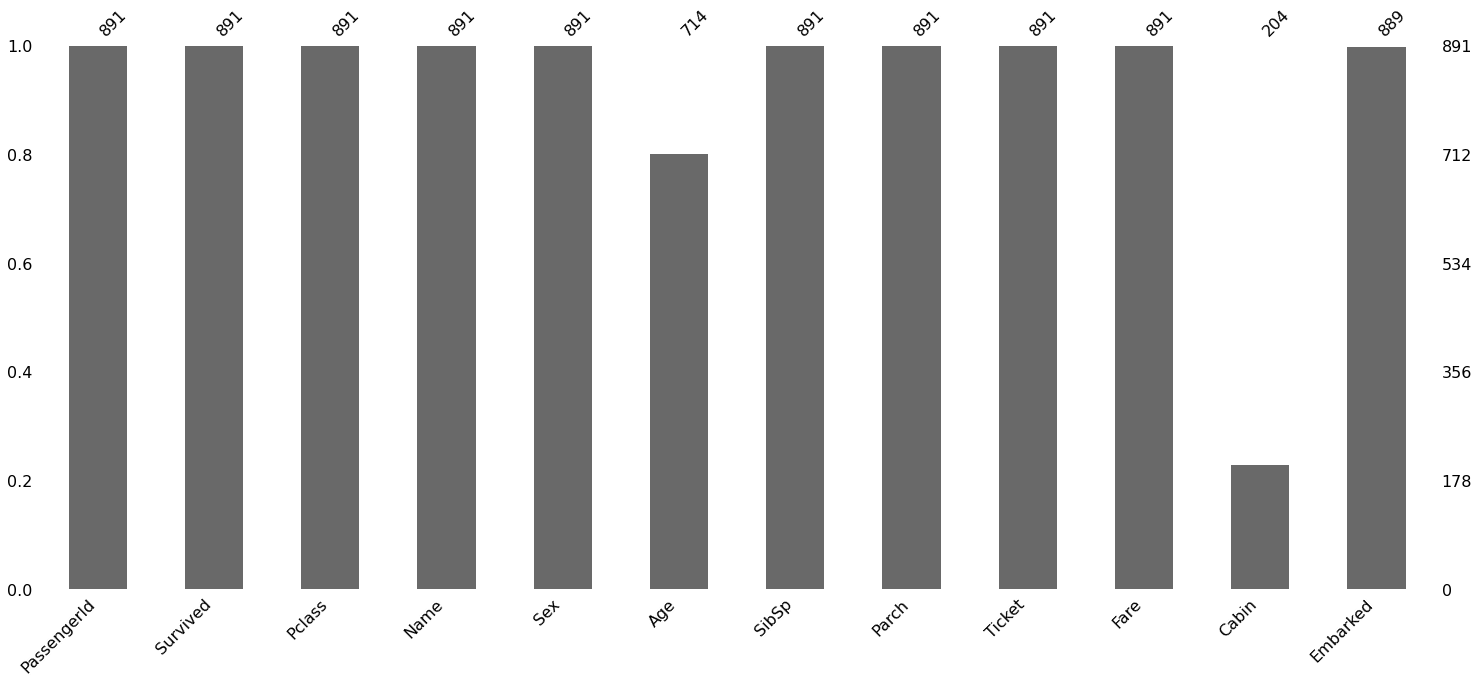

In [26]:
msna.bar(data)

In [27]:
#if column have less than 20 % non null values then it is best practice to drop that column 

<AxesSubplot:>

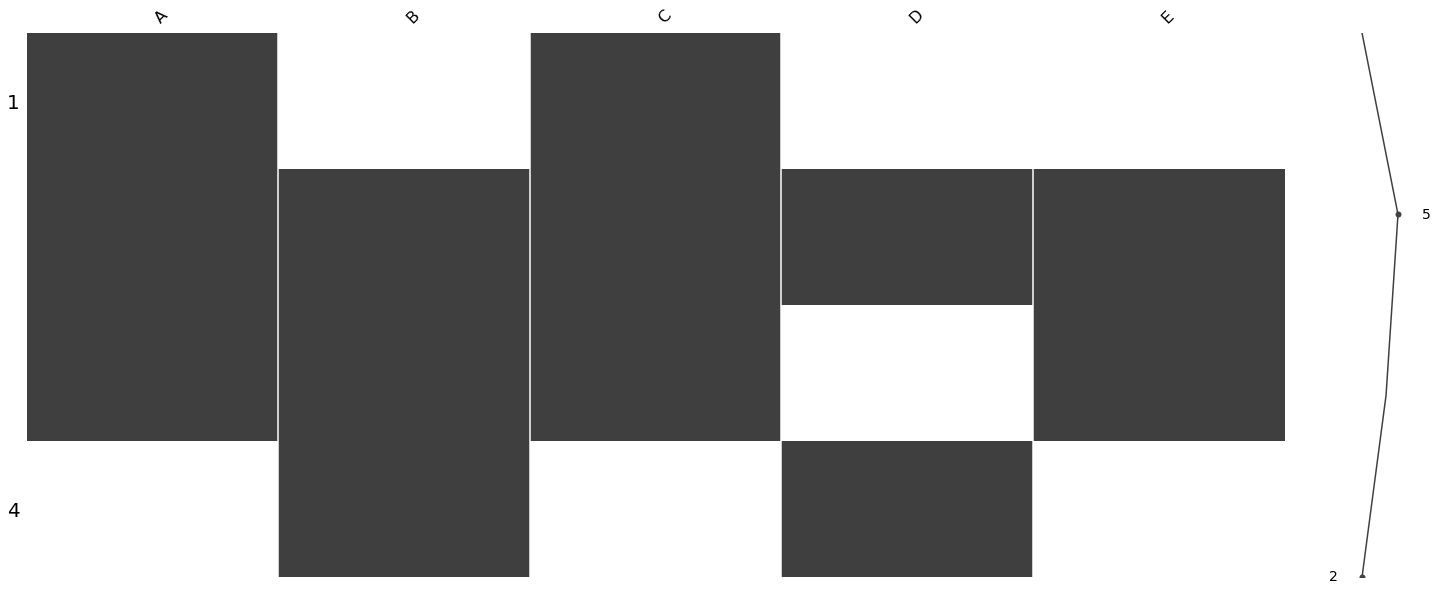

In [28]:
msna.matrix(df)

<AxesSubplot:>

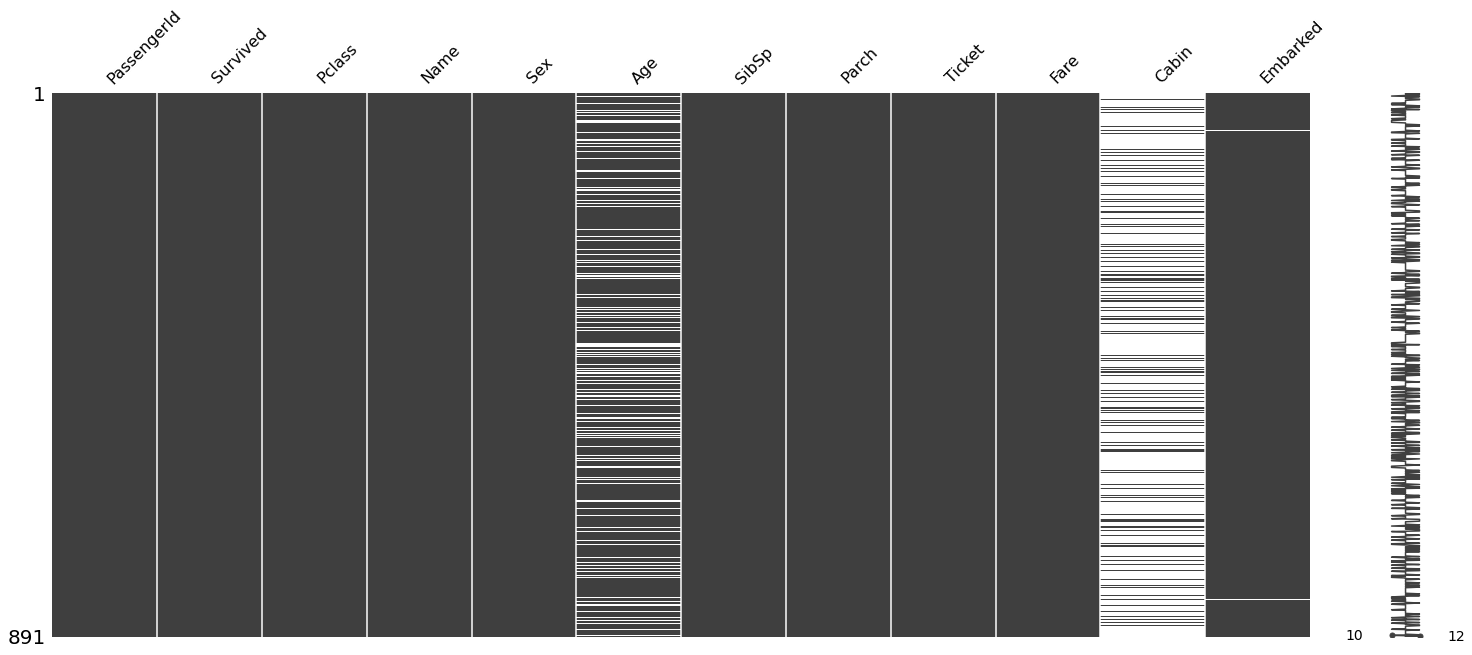

In [29]:
msna.matrix(data)

<AxesSubplot:>

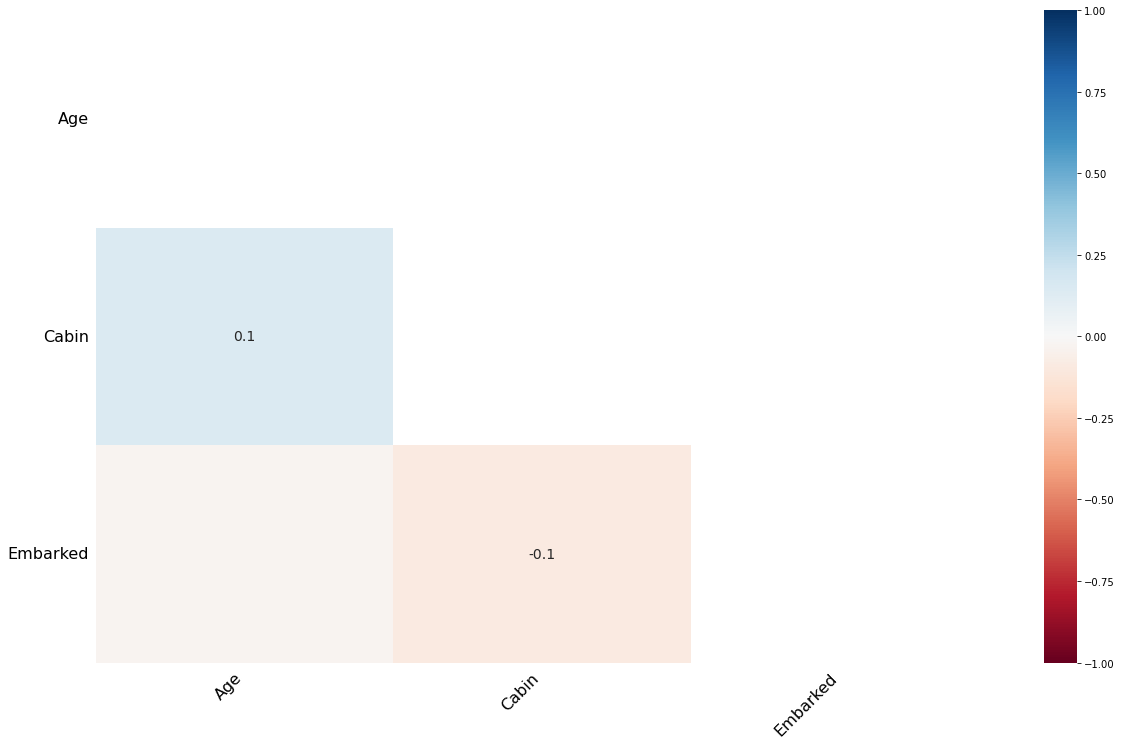

In [30]:
msna.heatmap(data)

<AxesSubplot:>

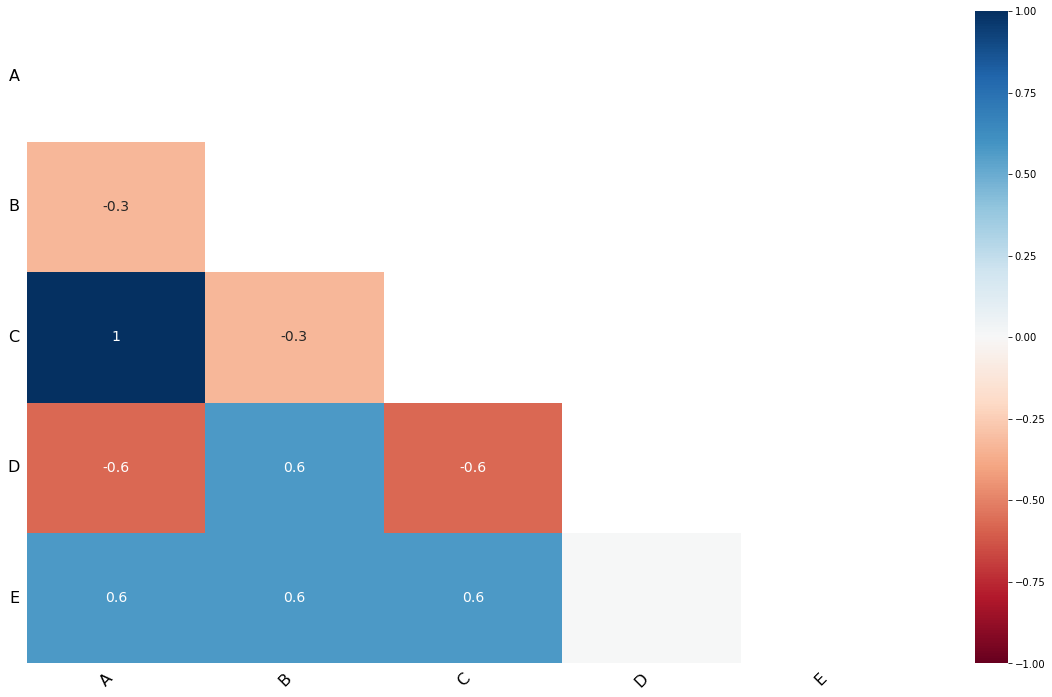

In [31]:
msna.heatmap(df)

In [32]:
df

A     B     C     D    E
0  1.0   NaN  11.0   NaN  NaN
1  2.0  12.0  22.0   2.0  2.0
2  3.0   3.0  34.0   NaN  3.0
3  NaN   5.0   NaN  44.0  NaN

In [33]:
data_count_of_missvalues_by_col = (data.isnull().sum())
display(data_count_of_missvalues_by_col)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
display(data_count_of_missvalues_by_col[data_count_of_missvalues_by_col>1])

Age         177
Cabin       687
Embarked      2
dtype: int64

In [35]:
display(data_count_of_missvalues_by_col[data_count_of_missvalues_by_col>1]/data.shape[0]*100)

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

## Lecture 3

### Pairwise Deletion

In [36]:
df

A     B     C     D    E
0  1.0   NaN  11.0   NaN  NaN
1  2.0  12.0  22.0   2.0  2.0
2  3.0   3.0  34.0   NaN  3.0
3  NaN   5.0   NaN  44.0  NaN

In [37]:
 #pandas take care of null values and we can perform different operations

In [38]:
df.sum()

A     6.0
B    20.0
C    67.0
D    46.0
E     5.0
dtype: float64

In [39]:
data2=data.copy()
data2['Age'].mean()

29.69911764705882

### Listwise/Row wise Deletion

In [40]:
df.dropna()

A     B     C    D    E
1  2.0  12.0  22.0  2.0  2.0

In [41]:
df

A     B     C     D    E
0  1.0   NaN  11.0   NaN  NaN
1  2.0  12.0  22.0   2.0  2.0
2  3.0   3.0  34.0   NaN  3.0
3  NaN   5.0   NaN  44.0  NaN

In [42]:
df.dropna(subset=['B']) #it will drop row where B's value is NaN

A     B     C     D    E
1  2.0  12.0  22.0   2.0  2.0
2  3.0   3.0  34.0   NaN  3.0
3  NaN   5.0   NaN  44.0  NaN

In [43]:
df.dropna(axis='rows',thresh=3)

A     B     C    D    E
1  2.0  12.0  22.0  2.0  2.0
2  3.0   3.0  34.0  NaN  3.0

### Dropping entire columns

In [44]:
df.dropna(axis='columns') # all the columns have atleast 1 null value

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

In [45]:
df.dropna(subset=['D','E'],how='all') #drop where D and E both are NaN

A     B     C     D    E
1  2.0  12.0  22.0   2.0  2.0
2  3.0   3.0  34.0   NaN  3.0
3  NaN   5.0   NaN  44.0  NaN

In [46]:
df.dropna(subset=['B','C'],how='any') #drop where B or C both are NaN

A     B     C    D    E
1  2.0  12.0  22.0  2.0  2.0
2  3.0   3.0  34.0  NaN  3.0

In [47]:
df.dropna(axis=1,how='all') #drop where row has all vaues  NaN

A     B     C     D    E
0  1.0   NaN  11.0   NaN  NaN
1  2.0  12.0  22.0   2.0  2.0
2  3.0   3.0  34.0   NaN  3.0
3  NaN   5.0   NaN  44.0  NaN

In [48]:
df.dropna(axis='columns',thresh=3)#drop where clumn has less than 3 non null values

A     B     C
0  1.0   NaN  11.0
1  2.0  12.0  22.0
2  3.0   3.0  34.0
3  NaN   5.0   NaN

In [49]:
df.dropna(axis='columns',thresh=int(0.8*df.shape[0]))

A     B     C
0  1.0   NaN  11.0
1  2.0  12.0  22.0
2  3.0   3.0  34.0
3  NaN   5.0   NaN

## Lecture 4 

### Imputation

In [50]:
data.Age.fillna(23)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    23.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [51]:
data.Age.fillna(data.Age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [52]:
data.Age.fillna(method='ffill')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [53]:
data.Age.fillna(method='bfill')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    26.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [54]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [55]:
df.replace(to_replace=np.nan,value=-99)

A     B     C     D     E
0   1.0 -99.0  11.0 -99.0 -99.0
1   2.0  12.0  22.0   2.0   2.0
2   3.0   3.0  34.0 -99.0   3.0
3 -99.0   5.0 -99.0  44.0 -99.0

In [56]:
df.replace(to_replace=11,value=np.nan)

A     B     C     D    E
0  1.0   NaN   NaN   NaN  NaN
1  2.0  12.0  22.0   2.0  2.0
2  3.0   3.0  34.0   NaN  3.0
3  NaN   5.0   NaN  44.0  NaN

## Lecture 5

### Removing duplicate values

In [57]:
data.head(50)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   
30           31         0       1   
31           32         1       1   
32           33         1       3   
33           34         0       2   
34           35         0       1   
35           36         0       1   
36           37         1       3   
37           38         0       3   
38           39         0       3   
39           40         1       3   
40           41         0       3   
41           42         0       2   
42           43         0       3   
43           44         1       2   
44           45         1       3   
45           46         0       3   
46           47         0       3   
47           48         1       3   
48           49         0       3   
49           50         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26        

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
data.Cabin.duplicated()

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [60]:
data[data.Cabin.duplicated()]

PassengerId  Survived  Pclass  \
2              3         1       3   
4              5         0       3   
5              6         0       3   
7              8         0       3   
8              9         1       3   
..           ...       ...     ...   
884          885         0       3   
885          886         0       3   
886          887         0       2   
888          889         0       3   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
2                               Heikkinen, Miss. Laina  female  26.0      0   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
..                                                 ...     ...   ...    ...   
884                             Sutehall, Mr. Henry Jr    male  25.0      0   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
886                              Montvila, Rev. Juozas    male  27.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
2        0  STON/O2. 3101282   7.9250   NaN        S  
4        0            373450   8.0500   NaN        S  
5        0            330877   8.4583   NaN        Q  
7        1            349909  21.0750   NaN        S  
8        2            347742  11.1333   NaN        S  
..     ...               ...      ...   ...      ...  
884      0   SOTON/OQ 392076   7.0500   NaN        S  
885      5            382652  29.1250   NaN        Q  
886      0            211536  13.0000   NaN        S  
888      2        W./C. 6607  23.4500   NaN        S  
890      0            370376   7.7500   NaN        Q  

[743 rows x 12 columns]

In [61]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [62]:
data.duplicated().sum()

0

In [63]:
data.duplicated(subset=['Survived','Pclass','Sex']).sum()

879

In [64]:
data[data.duplicated(subset=['Survived','Pclass','Sex'])]

PassengerId  Survived  Pclass  \
3              4         1       1   
4              5         0       3   
5              6         0       3   
7              8         0       3   
8              9         1       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch      Ticket     Fare Cabin Embarked  
3        0      113803  53.1000  C123        S  
4        0      373450   8.0500   NaN        S  
5        0      330877   8.4583   NaN        Q  
7        1      349909  21.0750   NaN        S  
8        2      347742  11.1333   NaN        S  
..     ...         ...      ...   ...      ...  
886      0      211536  13.0000   NaN        S  
887      0      112053  30.0000   B42        S  
888      2  W./C. 6607  23.4500   NaN        S  
889      0      111369  30.0000  C148        C  
890      0      370376   7.7500   NaN        Q  

[879 rows x 12 columns]

In [65]:
data[data.duplicated(subset=['Survived','Pclass','Sex'])==False]# for unique columns

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
6              7         0       1   
9             10         1       2   
14            15         0       3   
17            18         1       2   
20            21         0       2   
23            24         1       1   
36            37         1       3   
41            42         0       2   
177          178         0       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
20                                Fynney, Mr. Joseph J    male  35.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
36                                    Mamee, Mr. Hanna    male   NaN      0   
41   Turpin, Mrs. William John Robert (Dorothy Ann ...  female  27.0      1   
177                         Isham, Miss. Ann Elizabeth  female  50.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
6        0             17463  51.8625   E46        S  
9        0            237736  30.0708   NaN        C  
14       0            350406   7.8542   NaN        S  
17       0            244373  13.0000   NaN        S  
20       0            239865  26.0000   NaN        S  
23       0            113788  35.5000    A6        S  
36       0              2677   7.2292   NaN        C  
41       0             11668  21.0000   NaN        S  
177      0          PC 17595  28.7125   C49        C

In [66]:
df

A     B     C     D    E
0  1.0   NaN  11.0   NaN  NaN
1  2.0  12.0  22.0   2.0  2.0
2  3.0   3.0  34.0   NaN  3.0
3  NaN   5.0   NaN  44.0  NaN

In [67]:
df.D.duplicated()

0    False
1    False
2     True
3    False
Name: D, dtype: bool

In [68]:
df.E.duplicated()

0    False
1    False
2    False
3     True
Name: E, dtype: bool

In [69]:
ndata1=data.sample(5)
ndata2=data.append(ndata1)

In [70]:
ndata2.duplicated().sum()

5

In [71]:
ndata2.loc[0,'Age']

22.0

In [72]:
ndata2.loc[ndata2.duplicated()]

PassengerId  Survived  Pclass  \
729          730         0       3   
764          765         0       3   
829          830         1       1   
142          143         1       3   
39            40         1       3   

                                                  Name     Sex   Age  SibSp  \
729                      Ilmakangas, Miss. Pieta Sofia  female  25.0      1   
764                             Eklund, Mr. Hans Linus    male  16.0      0   
829          Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0      0   
142  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...  female  24.0      1   
39                         Nicola-Yarred, Miss. Jamila  female  14.0      1   

     Parch            Ticket     Fare Cabin Embarked  
729      0  STON/O2. 3101271   7.9250   NaN        S  
764      0            347074   7.7750   NaN        S  
829      0            113572  80.0000   B28      NaN  
142      0  STON/O2. 3101279  15.8500   NaN        S  
39       0              2651  11.2417   NaN        C

In [73]:
ndata1

PassengerId  Survived  Pclass  \
729          730         0       3   
764          765         0       3   
829          830         1       1   
142          143         1       3   
39            40         1       3   

                                                  Name     Sex   Age  SibSp  \
729                      Ilmakangas, Miss. Pieta Sofia  female  25.0      1   
764                             Eklund, Mr. Hans Linus    male  16.0      0   
829          Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0      0   
142  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...  female  24.0      1   
39                         Nicola-Yarred, Miss. Jamila  female  14.0      1   

     Parch            Ticket     Fare Cabin Embarked  
729      0  STON/O2. 3101271   7.9250   NaN        S  
764      0            347074   7.7750   NaN        S  
829      0            113572  80.0000   B28      NaN  
142      0  STON/O2. 3101279  15.8500   NaN        S  
39       0              2651  11.2417   NaN        C

In [74]:
ndata3=ndata2.drop_duplicates()
ndata3

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [75]:
ndata4=ndata2.drop_duplicates(keep='last').reset_index()
ndata4

index  PassengerId  Survived  Pclass  \
0        0            1         0       3   
1        1            2         1       1   
2        2            3         1       3   
3        3            4         1       1   
4        4            5         0       3   
..     ...          ...       ...     ...   
886    729          730         0       3   
887    764          765         0       3   
888    829          830         1       1   
889    142          143         1       3   
890     39           40         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                      Ilmakangas, Miss. Pieta Sofia  female  25.0      1   
887                             Eklund, Mr. Hans Linus    male  16.0      0   
888          Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0      0   
889  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...  female  24.0      1   
890                        Nicola-Yarred, Miss. Jamila  female  14.0      1   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0  STON/O2. 3101271   7.9250   NaN        S  
887      0            347074   7.7750   NaN        S  
888      0            113572  80.0000   B28      NaN  
889      0  STON/O2. 3101279  15.8500   NaN        S  
890      0              2651  11.2417   NaN        C  

[891 rows x 13 columns]

In [76]:
ndata2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
729          730         0       3   
764          765         0       3   
829          830         1       1   
142          143         1       3   
39            40         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
729                      Ilmakangas, Miss. Pieta Sofia  female  25.0      1   
764                             Eklund, Mr. Hans Linus    male  16.0      0   
829          Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0      0   
142  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...  female  24.0      1   
39                         Nicola-Yarred, Miss. Jamila  female  14.0      1   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
729      0  STON/O2. 3101271   7.9250   NaN        S  
764      0            347074   7.7750   NaN        S  
829      0            113572  80.0000   B28      NaN  
142      0  STON/O2. 3101279  15.8500   NaN        S  
39       0              2651  11.2417   NaN        C  

[896 rows x 12 columns]

In [77]:
ndata5=ndata2.drop_duplicates(subset=['Survived','Pclass','Sex']) #for unique columns
ndata5

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
6              7         0       1   
9             10         1       2   
14            15         0       3   
17            18         1       2   
20            21         0       2   
23            24         1       1   
36            37         1       3   
41            42         0       2   
177          178         0       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
20                                Fynney, Mr. Joseph J    male  35.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
36                                    Mamee, Mr. Hanna    male   NaN      0   
41   Turpin, Mrs. William John Robert (Dorothy Ann ...  female  27.0      1   
177                         Isham, Miss. Ann Elizabeth  female  50.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
6        0             17463  51.8625   E46        S  
9        0            237736  30.0708   NaN        C  
14       0            350406   7.8542   NaN        S  
17       0            244373  13.0000   NaN        S  
20       0            239865  26.0000   NaN        S  
23       0            113788  35.5000    A6        S  
36       0              2677   7.2292   NaN        C  
41       0             11668  21.0000   NaN        S  
177      0          PC 17595  28.7125   C49        C

##  Lecture 6

###  Parsing Dates

In [78]:
sales= pd.read_csv("D:/DATASETS/sales/sales.csv")
sales

D:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]

In [79]:
sales.shape

(1017209, 9)

In [80]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [81]:
#converting date data type to datetime
sales['Date2']=pd.to_datetime(sales['Date'])

In [82]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  object        
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Date2          1017209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 77.6+ MB


In [83]:
pd.to_datetime(sales['Date'],format='%Y-%m-%d')

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]

In [84]:
df2=pd.DataFrame ({'date':['6/10/2013 3.30.0','9/10/2016 4.30.0','12/10/2022 10.03.0','a/10/2022 10.03.0'],
                     'value':[1,2,3,4]
                    })
df2.to_csv('df2.csv')

In [85]:
df2= pd.read_csv("df2.csv",index_col=[0])
df2

date  value
0    6/10/2013 3.30.0      1
1    9/10/2016 4.30.0      2
2  12/10/2022 10.03.0      3
3   a/10/2022 10.03.0      4

In [86]:
df2['date']=pd.to_datetime(df2['date'],format='%m/%d/%Y %H.%M.%S',errors='ignore')
df2

date  value
0    6/10/2013 3.30.0      1
1    9/10/2016 4.30.0      2
2  12/10/2022 10.03.0      3
3   a/10/2022 10.03.0      4

In [87]:
df2['date']=pd.to_datetime(df2['date'],format='%m/%d/%Y %H.%M.%S',errors='coerce')
df2

date  value
0 2013-06-10 03:30:00      1
1 2016-09-10 04:30:00      2
2 2022-12-10 10:03:00      3
3                 NaT      4

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   value   4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 96.0 bytes


In [89]:
df3=pd.DataFrame ({'year':[2013,2014],
                   'month':[1,12],
                   'day':[3,6]
                    })
df3.to_csv('df3.csv')

In [90]:
df3= pd.read_csv("df3.csv",index_col=[0])
df3

year  month  day
0  2013      1    3
1  2014     12    6

In [91]:
df3['Date']=pd.to_datetime(df3)

In [92]:
df3

year  month  day       Date
0  2013      1    3 2013-01-03
1  2014     12    6 2014-12-06

In [93]:
df3['new year']=df3['Date'].dt.year
df3['new month']=df3['Date'].dt.month
df3['new day']=df3['Date'].dt.day
#other exaples are dt.week,dt.dayofweek,dt.is_leap_year especially use for time series

In [94]:
df3['week']=df3['Date'].dt.week
df3['day of week']=df3['Date'].dt.dayofweek
df3['leap year']=df3['Date'].dt.is_leap_year

C:\Users\ITEXPE~1\AppData\Local\Temp/ipykernel_4704/2142263942.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df3['week']=df3['Date'].dt.week


In [95]:
df3

year  month  day       Date  new year  new month  new day  week  \
0  2013      1    3 2013-01-03      2013          1        3     1   
1  2014     12    6 2014-12-06      2014         12        6    49   

   day of week  leap year  
0            3      False  
1            5      False

In [96]:
sales['Date']=pd.to_datetime(sales['Date'],errors='ignore')

In [97]:
sales=sales.set_index(['Date'])
sales.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   

            SchoolHoliday      Date2  
Date                                  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31

In [98]:
sales.loc['2015']

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   
...           ...        ...    ...        ...   ...    ...          ...   
2015-01-01   1111          4      0          0     0      0            a   
2015-01-01   1112          4      0          0     0      0            a   
2015-01-01   1113          4      0          0     0      0            a   
2015-01-01   1114          4      0          0     0      0            a   
2015-01-01   1115          4      0          0     0      0            a   

            SchoolHoliday      Date2  
Date                                  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31  
...                   ...        ...  
2015-01-01              1 2015-01-01  
2015-01-01              1 2015-01-01  
2015-01-01              1 2015-01-01  
2015-01-01              1 2015-01-01  
2015-01-01              1 2015-01-01  

[236380 rows x 9 columns]

In [99]:
sales.loc['2015-5']

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-05-31      1          7      0          0     0      0            0   
2015-05-31      2          7      0          0     0      0            0   
2015-05-31      3          7      0          0     0      0            0   
2015-05-31      4          7      0          0     0      0            0   
2015-05-31      5          7      0          0     0      0            0   
...           ...        ...    ...        ...   ...    ...          ...   
2015-05-01   1111          5      0          0     0      1            a   
2015-05-01   1112          5      0          0     0      1            a   
2015-05-01   1113          5      0          0     0      1            a   
2015-05-01   1114          5      0          0     0      1            a   
2015-05-01   1115          5      0          0     0      1            a   

            SchoolHoliday      Date2  
Date                                  
2015-05-31              0 2015-05-31  
2015-05-31              0 2015-05-31  
2015-05-31              0 2015-05-31  
2015-05-31              0 2015-05-31  
2015-05-31              0 2015-05-31  
...                   ...        ...  
2015-05-01              0 2015-05-01  
2015-05-01              0 2015-05-01  
2015-05-01              0 2015-05-01  
2015-05-01              0 2015-05-01  
2015-05-01              0 2015-05-01  

[34565 rows x 9 columns]

In [100]:
sales.loc['2013':'2015']

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   
...           ...        ...    ...        ...   ...    ...          ...   
2013-01-01   1111          2      0          0     0      0            a   
2013-01-01   1112          2      0          0     0      0            a   
2013-01-01   1113          2      0          0     0      0            a   
2013-01-01   1114          2      0          0     0      0            a   
2013-01-01   1115          2      0          0     0      0            a   

            SchoolHoliday      Date2  
Date                                  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31  
2015-07-31              1 2015-07-31  
...                   ...        ...  
2013-01-01              1 2013-01-01  
2013-01-01              1 2013-01-01  
2013-01-01              1 2013-01-01  
2013-01-01              1 2013-01-01  
2013-01-01              1 2013-01-01  

[1017209 rows x 9 columns]

In [101]:
sales['2015'].groupby('StateHoliday').sum()

C:\Users\ITEXPE~1\AppData\Local\Temp/ipykernel_4704/263220351.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sales['2015'].groupby('StateHoliday').sum()


Store  DayOfWeek       Sales  Customers    Open  Promo  \
StateHoliday                                                               
0             127581503     920797  1387230968  147207050  195790  91470   
a               3074197      19148     1753281     255737     193   2190   
b               1244340       6690      515394      85572      49   1115   

              SchoolHoliday  
StateHoliday                 
0                     31861  
a                      1360  
b                      2062

In [102]:
sales.Date2.max()

Timestamp('2015-07-31 00:00:00')

In [104]:
sales.Date2.min() 

Timestamp('2013-01-01 00:00:00')

## Lecture 7

### Regular Expressions

In [105]:
import re

In [106]:
re.match('Babar','Babar is a classy player')

<re.Match object; span=(0, 5), match='Babar'>

In [107]:
d = 'Babar is a classy player'
d[0:5]

'Babar'

In [109]:
x=re.match('python','pythons')
x

<re.Match object; span=(0, 6), match='python'>

In [110]:
x.string

'pythons'

In [113]:
x.span()[1]

6

In [114]:
x.group() #matched string

'python'

### using compile

In [128]:
prog = re.compile('python')
prog.match('python is a good language')

<re.Match object; span=(0, 6), match='python'>

In [126]:
prog = re.compile('is')
prog.match('python is a good language',pos=7)

<re.Match object; span=(7, 9), match='is'>

### search

In [129]:
prog =re.compile('ing')
prog.search('coding')

<re.Match object; span=(3, 6), match='ing'>

In [131]:
prog.match('coding')

In [133]:
prog.match('coding',pos=3)

<re.Match object; span=(3, 6), match='ing'>

### Findall

In [135]:
prog.findall('enjoying coding')


['ing', 'ing']

## Lecture 8

### Type Conversions

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [137]:
data['Pclass']=data['Pclass'].astype('float')

In [139]:
data['Fare']=data['Fare'].astype('int')

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int32  
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 80.2+ KB


In [141]:
data['Pclass']=data['Pclass'].astype('int')
data['Fare']=data['Fare'].astype('float')

In [142]:
data['Embarked']=data['Embarked'].astype('category')

In [143]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   31.785634  
std      0.806057   49.703730  
min      0.000000    0.000000  
25%      0.000000    7.000000  
50%      0.000000   14.000000  
75%      0.000000   31.000000  
max      6.000000  512.000000

In [144]:
data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object